# 6. Lasso Regression
Use Case: When there are many features, and some are irrelevant (automatic feature selection).

Why Use:

Regularizes coefficients by penalizing their absolute values (L1 penalty).
Shrinks some coefficients to zero, effectively selecting features.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

In [4]:
data=pd.read_csv('AirPassengers.csv')

In [5]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [6]:
print(data.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [7]:
print(data.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [8]:
#converting a month to date_time format
data['Month'] = pd.to_datetime(data['Month'])  # Parse dates
data.set_index('Month', inplace=True)

In [10]:
data['TimeIndex']=np.arange(len(data))

In [11]:
# Instead of using the lists 'x' and 'y', access the data directly from the DataFrame:
X = data[['TimeIndex']]  # Use double brackets to select as a DataFrame
y = data['#Passengers']

# Now you can split the data into training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

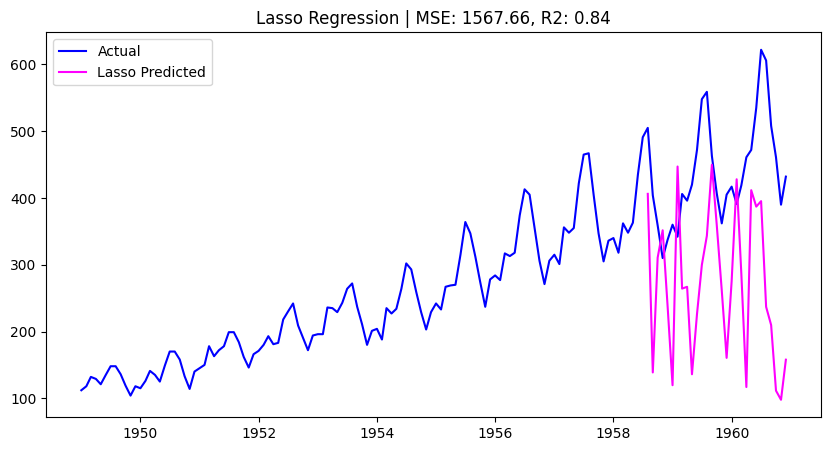

In [12]:
from sklearn.linear_model import Lasso

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(data.index, y, label='Actual', color='blue')
plt.plot(data.index[-len(y_test):], y_pred_lasso, label='Lasso Predicted', color='magenta')
plt.legend()
plt.title(f'Lasso Regression | MSE: {mse_lasso:.2f}, R2: {r2_lasso:.2f}')
plt.show()
